Project Proposal

Chris Norman

Introduction and Background 

What is the question you hope you can answer?

The question I hope to answer is the percentage of students that graduate college.

Why is the question important to you?

This is important to me because I am in my first year of college and it is just interesting to see the start to finish ratio.

What are you hoping to achieve with the project?

I can hope to inspire other people to be that percent that ends up graduating and to not give up.

Description of the data

Where did you get your data?

I got my data from Kaggle datasets.

What data is found in your data set?

This dataset has information about colleges in the U.S. It shows if a school is private or public and how many students applied, got accepted, and enrolled. It also has details about students and teachers, like class sizes and teacher degrees. The dataset includes costs like tuition, housing, books, and other expenses. It also shows things like how many alumni give back and how many students graduate.


Are there any ethical concerns with using the data or how the data was obtained?

There aren’t big ethical issues because the data is public and doesn’t include any personal information. The only thing to be careful about is not jumping to unfair conclusions about groups of people based on the numbers.


Is there a public location where the data is freely available? If so where? If not why?

Yes this data is publicly available. You can easily find it on kaggle which is a public website.

Initial Exploratory Data Analysis

In [2]:
!conda install -y openpyxl

Jupyter detected...
3 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: C:\Users\chris\anaconda3

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.11.12 |       h4c7d964_0         149 KB  conda-forge
    certifi-2025.11.12         |     pyhd8ed1ab_0         153 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         303 KB

The following packages will be UPDATED:

  ca-certificates                      2025.10.5-h4c7d964_0 --> 2025.11.12-h4c7d964_0 
  certifi                            2025.10.5-pyhd8ed1ab_0 --> 2025.11.12-pyhd8ed1ab_0 



certifi-2025.11.12   | 153 KB    |            |   0% 

ca-certificates-2025



==> WARNING: A newer version of conda exists. <==
    current version: 25.7.0
    latest version: 25.9.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

In [22]:
file_name = 'collegedata.csv'
DF = pd.read_csv(file_name)

In [25]:
show(DF)

Loading ITables v2.5.2 from the internet... (need help?)


Definition of all variables (or explanation for why you are not considering some variables)

The dataset contains information on colleges, including whether they are private or public, the number of applications received, accepted, and enrolled, and the percentage of students from top high school classes, which indicate selectivity. It also includes undergraduate population (full- and part-time), tuition for out-of-state students, and estimated costs for room, board, books, and personal expenses, useful for analyzing financial aspects. Faculty quality is captured through the percentage with PhDs or terminal degrees and the student-to-faculty ratio. Alumni engagement and school resources are measured via percentage of alumni donating and instructional expenditure per student. Graduation rate is included as a key outcome metric, while some variables like books, personal expenses, or redundant faculty measures may be less critical depending on the analysis.


Descriptive statistics for the data set, counts of the variables, value counts (frequency tables) for each categorical variable of interest.

In [27]:
import pandas as pd

# Load the dataset
df = pd.read_csv('collegedata.csv')

numeric_summary = df.describe()  # Gives count, mean, std, min, 25%, 50%, 75%, max
print("Descriptive Statistics for Numeric Variables:\n")
print(numeric_summary)


categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nFrequency Tables for Categorical Variables:\n")

for col in categorical_cols:
    print(f"Variable: {col}")
    print(df[col].value_counts())
    print("\n")


Descriptive Statistics for Numeric Variables:

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.6

Plots that help a reader understand your data.

In [32]:
import pandas as pd

df = pd.read_csv('collegedata.csv')
print(df.columns)


Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')


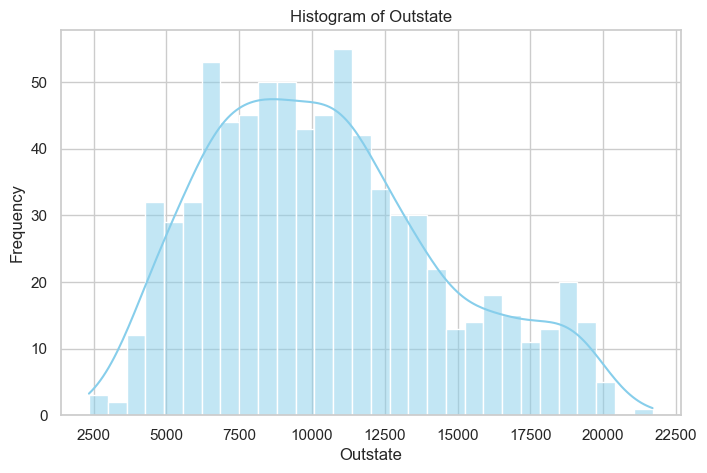

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('collegedata.csv')

# Histogram for a numeric variable
plt.figure(figsize=(8, 5))
sns.histplot(df['Outstate'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Outstate')
plt.xlabel('Outstate')
plt.ylabel('Frequency')
plt.show()


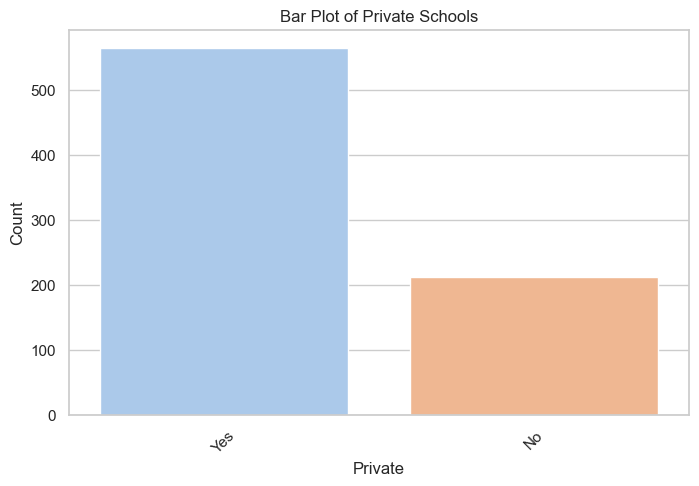

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('collegedata.csv')

# Bar plot for a categorical variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Private', palette='pastel')
plt.title('Bar Plot of Private Schools')
plt.xlabel('Private')
plt.ylabel('Count')
plt.xticks(rotation=45)  # rotate labels if needed
plt.show()


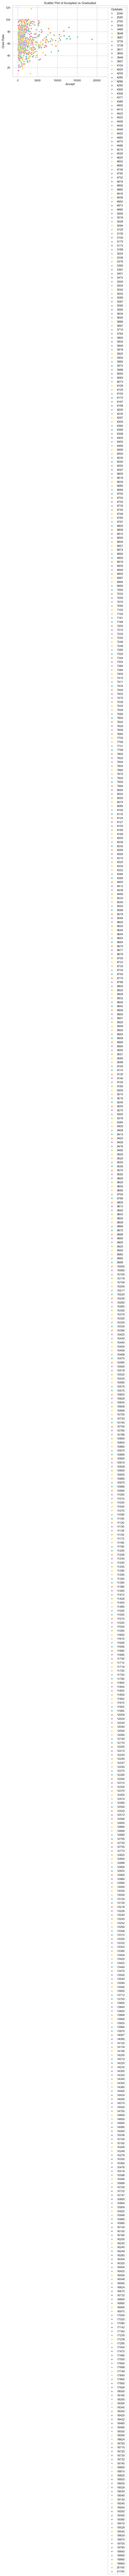

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('collegedata.csv')

# Scatter plot between two numeric variables
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Accept', y='Grad.Rate', hue='Outstate', palette='Set2')
plt.title('Scatter Plot of Accepted vs Graduated')
plt.xlabel('Accept')
plt.ylabel('Grad.Rate')
plt.legend(title='Outstate')
plt.show()


Initial analysis to answer initial data questions.

The dataset contains both numeric and categorical variables, which were summarized using descriptive statistics and frequency counts to understand distributions. Missing values and data types were checked to identify potential cleaning or preprocessing needs. Histograms and bar plots were created to visualize the distribution of numeric and categorical variables, respectively, while scatter plots helped examine relationships between numeric variables. Correlation analysis was conducted to identify potential linear relationships among numeric variables. This initial exploration highlights key patterns, outliers, and variable distributions, providing a foundation for deeper analysis.


Proposal for further study.

What larger questions would you like to try to answer?

1. Which factors have the strongest impact on target variable and can we predict its value based on other features?
2. Are there significant differences in [numeric] across different categories of [categorical variable]?


What predictive analysis do you think might be possible?

1. Predict Numbers – for example, guessing a value like price, score, or sales based on other information in the dataset.
2. Predict Categories – like yes/no, low/medium/high, or which group something belongs to.
3. Find Groups – see if the data naturally forms clusters, which can help understand patterns.
4. Forecast Trends – if there’s a time element, we could try to guess what might happen in the future.




Are there any larger impacts that your study might have?

This study could help people make better choices by showing patterns in the data. It might save time or money by pointing out easier ways to do things. The results could also help plan for the future by guessing what might happen next. It could lead to new questions and more research. Overall, what we learn could be useful in other situations too.
